In [1]:
import os,sys,inspect
sys.path.insert(0,os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))))

from server.py_rmpe_config import RmpeCocoConfig
from utils.data import DataIterator
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

AttributeError: 'filter' object has no attribute 'insert'

# Define generator parameters
`batch_size`: number of batches

`num_outs`: number of intermediate losses in the network

`data_dir`: directory to coco dataset, `/slow_data/muhammed/mscoco` for DL servers

In [2]:
batch_size = 1
num_outs   = 1
data_dir   = '/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/'

# Initialize data generator class
It takes some time due to large `.h5` file.

Note that `visualize` parameter should be `False` during training. Figure out why we need a `visualize` parameter?

Set `augment=False` to see the effect of augmentation

In [3]:
train_client = DataIterator(os.path.join(data_dir, 'coco_train_dataset_480.h5'),
                            RmpeCocoConfig,
                            shuffle=True,
                            augment=True,
                            batch_size=batch_size,
                            num_out=num_outs,
                            visualize=True)

117576


In [4]:
train_gen = train_client.gen()

Sample output from the generator.

You can walk through the dataset by invoking the `next()` function of generator

In [8]:
X, Y = next(train_gen)
print('Input type: %s, size: %d. Output type: %s, size: %d'%(type(X), len(X), type(Y), len(Y)))
for i in range(len(X)):
    print('X[%d] shape: %s'%(i, X[i].shape))
for i in range(len(Y)):
    print('Y[%d] shape: %s'%(i, Y[i].shape))

Input type: <class 'list'>, size: 2. Output type: <class 'list'>, size: 1

X[0] shape: (1, 480, 480, 3)
X[1] shape: (1, 120, 120, 19)

Y[0] shape: (1, 120, 120, 19)


# Visualize the sample results
Parse the outputs

In [9]:
image     = X[0][0]
loss_mask = X[1][0]
heatmaps  = Y[0][0]

Show the input image

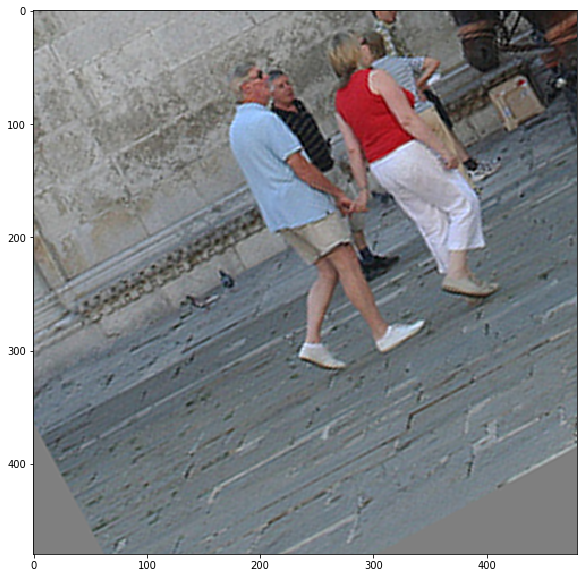

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(image)

Overlay ground-truth heatmaps on the image to debug the correctness.

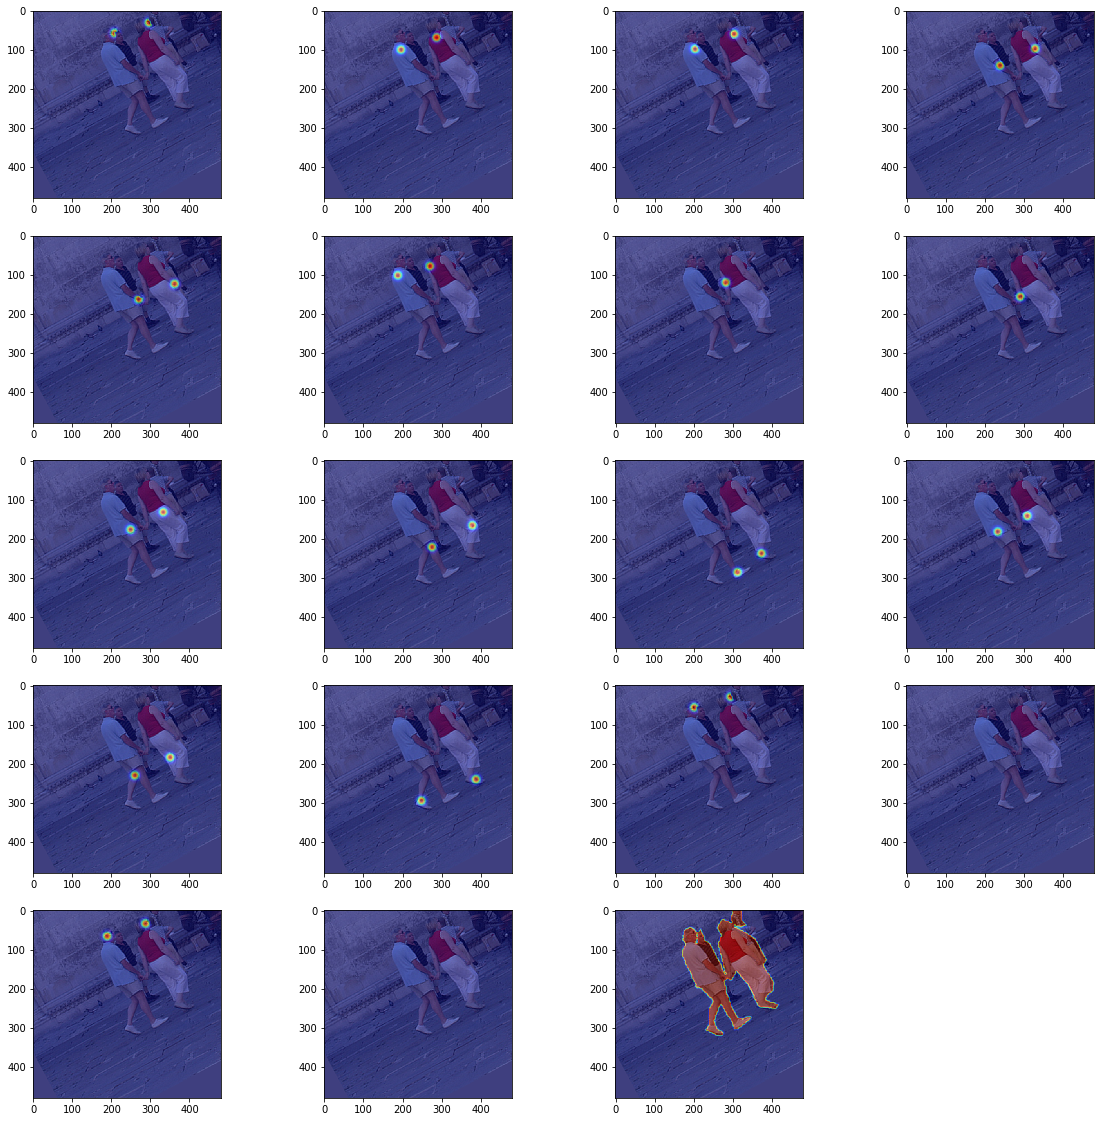

In [11]:
f, axarr = plt.subplots(5, 4)
f.set_size_inches((20, 20))

for ch in range(19):
    axarr[ch//4,ch%4].imshow(image)
    heatmap = cv2.resize(heatmaps[:,:,ch], (image.shape[1], image.shape[0]), cv2.INTER_LANCZOS4)
    axarr[ch//4,ch%4].imshow(heatmap, alpha=.5, cmap='jet', interpolation='none')

axarr[4,3].axis('off')
axarr[4,3].imshow(np.ones((384,256,3)))